In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
import sklearn.metrics as metrics
from keras.models import load_model
import cv2
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(180,
                                  180,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

1/1 [==============================] - 1s 549ms/step
This image most likely belongs to hugging 


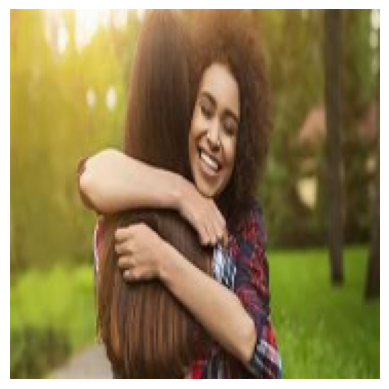

In [24]:
img_raw = tf.io.read_file(r"test10.jpg")
img_tensor = tf.image.decode_image(img_raw)
img = tf.image.resize(img_tensor, [180, 180])
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
model=load_model(r'Rohit.h5')
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
augmented_images = data_augmentation(img_array)
plt.imshow(augmented_images[0].numpy().astype("uint8"))
plt.axis("off")
class_names=['calling','clapping','eating','fighting','hugging','laughing','using_laptop']

print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)